# AI ODYSSEY: LSTM ASSIGNMENT

This assignment is aimed at implementing LSTMs that we had learnt in class. In this task, we'll implement a model that takes text data as input and returns the emotion behind the text.

## TEXT PRE-PROCESSING FOR NLP

**Import the dataset.**

In [ ]:
#ENTER YOUR CODE HERE

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('/content/new_dataset.csv')

In [3]:
df.head()

,sentiment,text
0,Negative,@xnausikaax oh no! where did u order from? tha...
1,Negative,A great hard training weekend is over. a coup...
2,Negative,"Right, off to work Only 5 hours to go until I..."
3,Negative,I am craving for japanese food
4,Negative,Jean Michel Jarre concert tomorrow gotta work...


,sentiment,text
0,Negative,@xnausikaax oh no! where did u order from? tha...
1,Negative,A great hard training weekend is over. a coup...
2,Negative,"Right, off to work Only 5 hours to go until I..."
3,Negative,I am craving for japanese food
4,Negative,Jean Michel Jarre concert tomorrow gotta work...


**The dataset clearly has a large no. of redundant words, because that is simply how we humans talk. We'll first remove the stopwords.**


In [ ]:
#ENTER YOUR CODE HERE

In [4]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,sentiment,text
0,Negative,@xnausikaax oh no! u order from? that's horrible
1,Negative,A great hard training weekend over. couple day...
2,Negative,"Right, work Only 5 hours go I'm free xD"
3,Negative,I craving japanese food
4,Negative,Jean Michel Jarre concert tomorrow gotta work ...


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,sentiment,text
0,Negative,@xnausikaax oh no! u order from? that's horrible
1,Negative,A great hard training weekend over. couple day...
2,Negative,"Right, work Only 5 hours go I'm free xD"
3,Negative,I craving japanese food
4,Negative,Jean Michel Jarre concert tomorrow gotta work ...


**Next, we'll remove some other info we dont need right now, like the handle names.**

In [ ]:
#ENTER YOUR CODE HERE

In [6]:
import re

df['text'] = df['text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
df.head()

,sentiment,text
0,Negative,xnausikaax oh no u order from thats horrible
1,Negative,A great hard training weekend over couple days...
2,Negative,Right work Only 5 hours go Im free xD
3,Negative,I craving japanese food
4,Negative,Jean Michel Jarre concert tomorrow gotta work ...


,sentiment,text
0,Negative,oh no u order from that s horrible
1,Negative,A great hard training weekend over couple days...
2,Negative,Right work Only 5 hours go I m free xD
3,Negative,I craving japanese food
4,Negative,Jean Michel Jarre concert tomorrow gotta work ...


**Now, we'll perform stemming, wherein we'll reduce the words to their root form.**

In [ ]:
#ENTER YOUR CODE HERE


In [7]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
df['text'] = df['text'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))
df.head()

,sentiment,text
0,Negative,xnausikaax oh no u order from that horribl
1,Negative,a great hard train weekend over coupl day rest...
2,Negative,right work onli 5 hour go im free xd
3,Negative,i crave japanes food
4,Negative,jean michel jarr concert tomorrow gotta work 7...


,sentiment,text
0,Negative,oh no u order from that s horr
1,Negative,a great hard training weekend over couple days...
2,Negative,right work only 5 hours go i m free xd
3,Negative,i craving japanese food
4,Negative,jean michel jarre concert tomorrow gotta work ...


**Now that we are done with pre-processing, lets see what the gist of the data is that our model should capture.**
**Generate a word-cloud for the positive and negative words of the dataset.**

In [ ]:
#ENTER YOUR CODE HERE

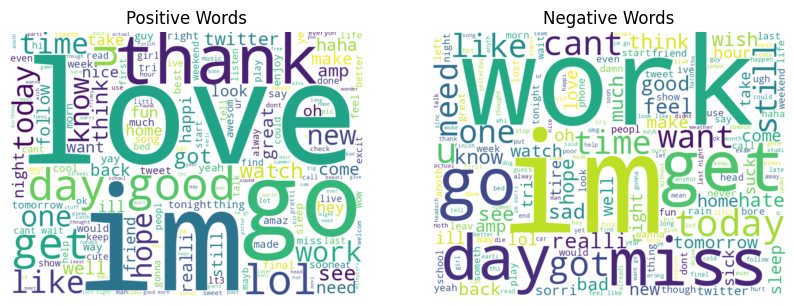

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'sentiment' column contains 1 for positive and 0 for negative
positive_tweets = df[df['sentiment'] == 'Positive']
negative_tweets = df[df['sentiment'] == 'Negative']

# Generate word clouds for positive and negative tweets
positive_wordcloud = WordCloud(width=800, height=600, background_color='white', stopwords=stop_words).generate(' '.join(positive_tweets['text']))
negative_wordcloud = WordCloud(width=800, height=600, background_color='white', stopwords=stop_words).generate(' '.join(negative_tweets['text']))

# Display the word clouds
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Words')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Words')

plt.show()

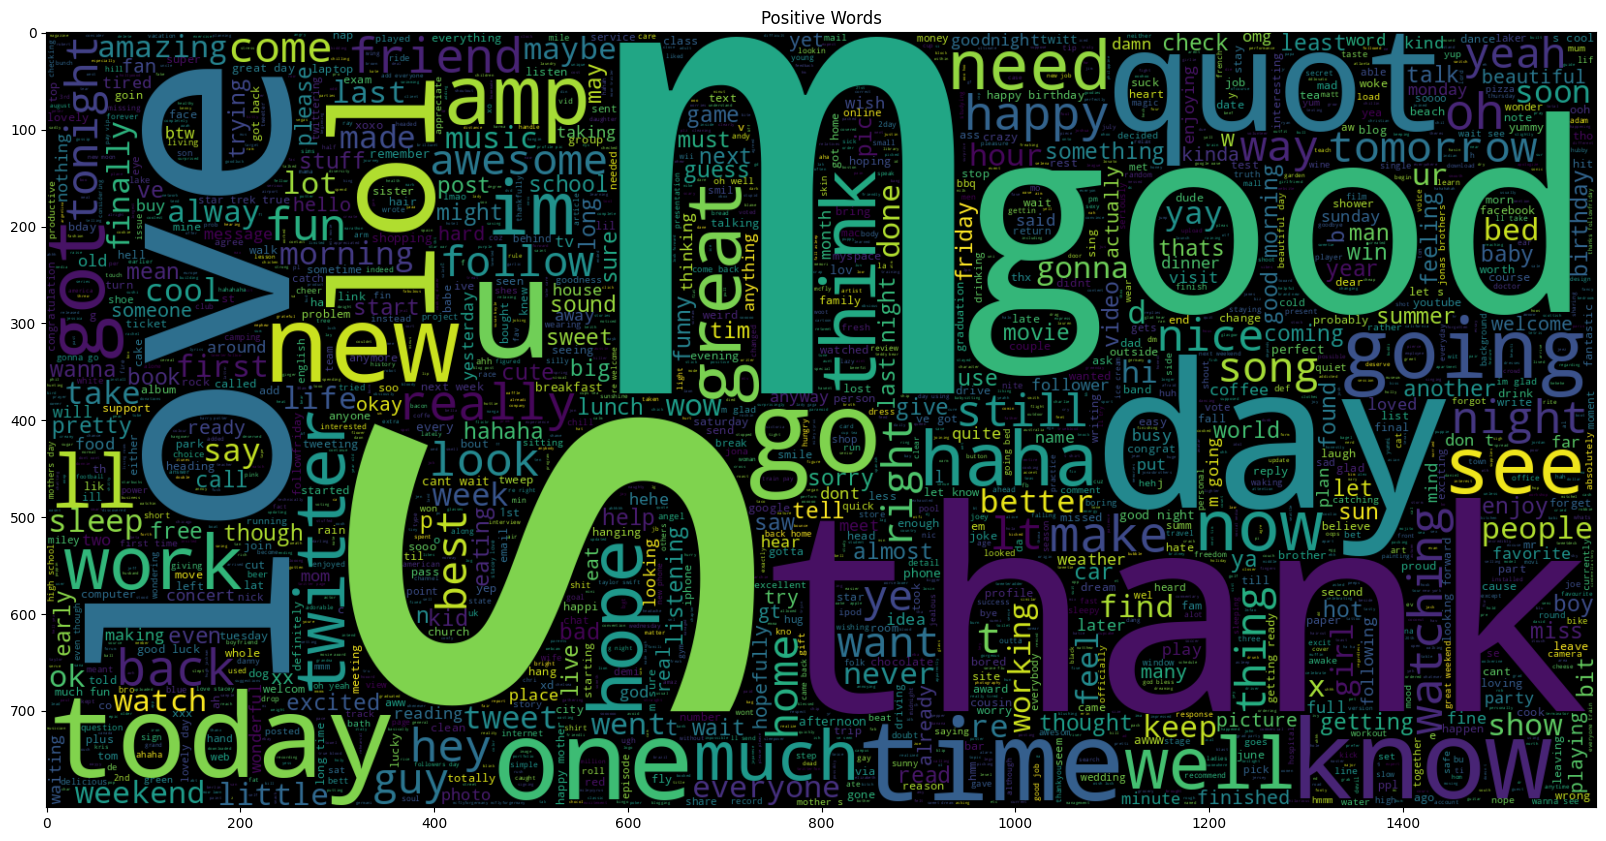

In [ ]:
#ENTER YOUR CODE HERE

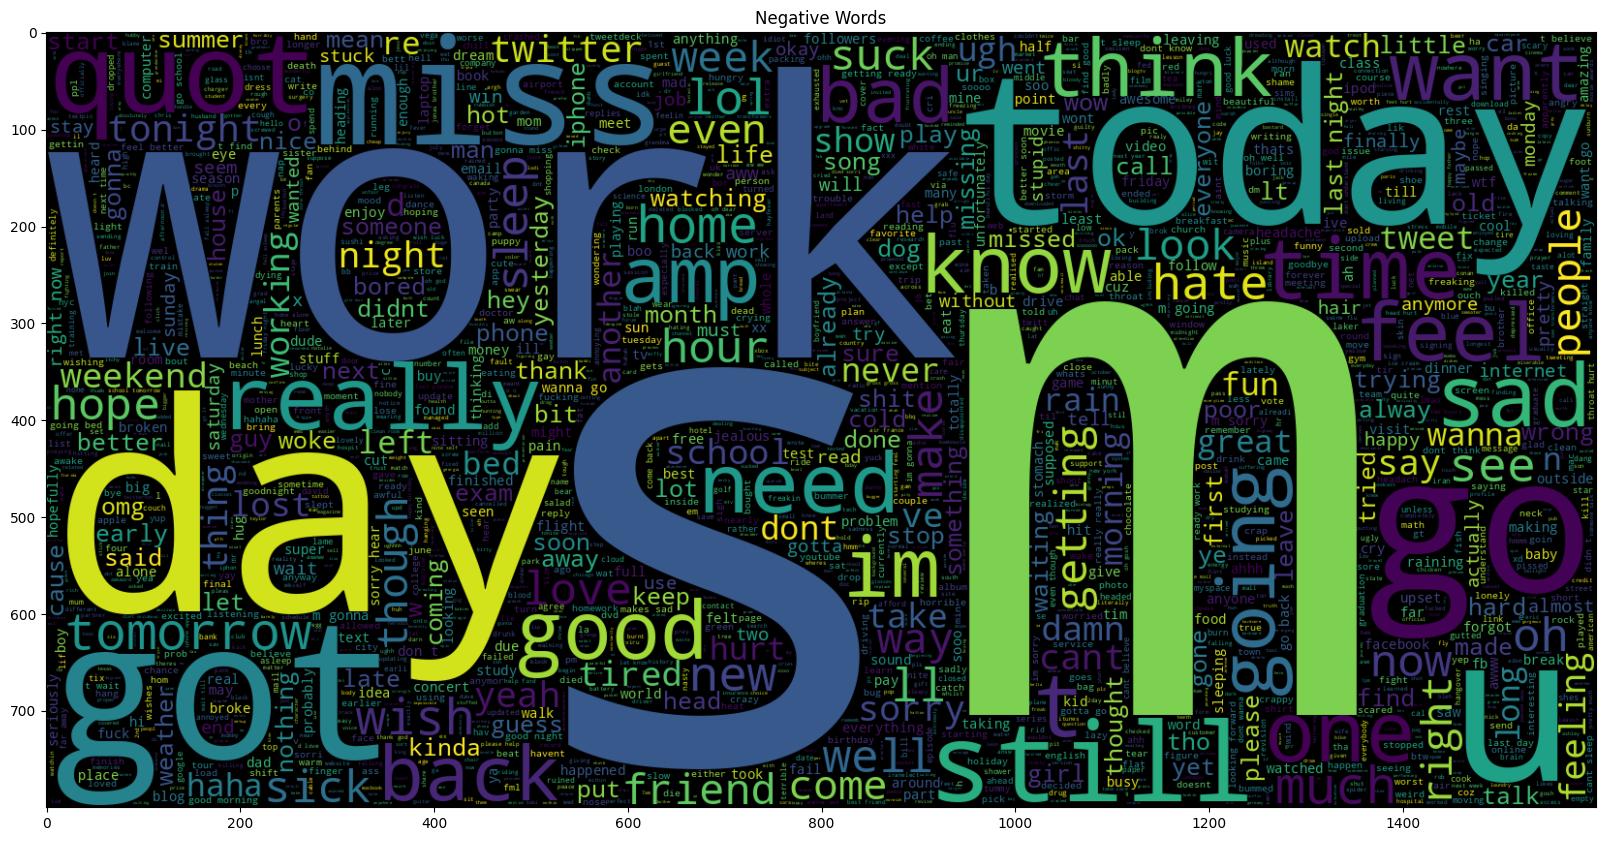

**I'd like to point out that 'Work' is bigger in the negative words display than it is in the positive words one.**

## TRAINING

**We have now processed the data for training. It's time for us to split it into training and test splits.**

In [ ]:
#ENTER YOUR CODE HERE

In [9]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(df, test_size=0.1, random_state=42)
print("Training Set Size:",train.shape[0])
print("Test Set Size:",test.shape[0])

Training Set Size: 9000
Test Set Size: 1000


Training Set Size: 9000
Test Set Size: 1000


**It is now time to convert our text sequences into numbers like the model will understand. Fit a tokenizer on the training dataset for the same. Let the vocab size be the no of unique words itself.**

In [ ]:
#ENTER YOUR CODE HERE

In [10]:
from tensorflow.keras.preprocessing.text import Tokenizer
num_words=len(set(train['text'].sum()))
tokenizer = Tokenizer(num_words)
tokenizer.fit_on_texts(train['text'])
word_index = tokenizer.word_index
train_sequences = tokenizer.texts_to_sequences(train['text'])
test_sequences = tokenizer.texts_to_sequences(test['text'])
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary size:", vocab_size)

Vocabulary size: 16014


Vocabulary Size : 13511


**Now transform the training and testing word sequences.**

In [ ]:
#ENTER YOUR CODE HERE

In [11]:
# Transform the training and testing word sequences
train_sequences = tokenizer.texts_to_sequences(train['text'])
test_sequences = tokenizer.texts_to_sequences(test['text'])
max_length = 36

# Print the transformed training and testing data
print('Training data:')
print(train_sequences[0])
print('Testing data:')
print(test_sequences[0])

Training data:
[1, 28, 16, 6]
Testing data:
[10]


Training data:
[1, 25, 411, 5140, 954, 1222, 954, 20, 894, 107, 5141]
Testing data:
[322, 677, 2477, 2488, 181, 618]


**It is necessary for the simplicity of the model that each text sequence be of the same length. Pad the sequences to make this possible.**

In [ ]:
#ENTER YOUR CODE HERE

In [12]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_length = max([len(x) for x in train_sequences])
train_padded = pad_sequences(train_sequences, maxlen=max_length)
test_padded = pad_sequences(test_sequences, maxlen=max_length)
print('Training data:')
print(train_padded[0])
print('Testing data:')
print(test_padded[0])

Training data:
[ 0  0  0  0  0  0  0  0  1 28 16  6]
Testing data:
[ 0  0  0  0  0  0  0  0  0  0  0 10]


Training data:
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    1   25  411
 5140  954 1222  954   20  894  107 5141]
Testing data:
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0  322  677 2477 2488  181  618]


**Label encode y.**

In [ ]:
#ENTER YOUR CODE HERE

In [13]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(train['sentiment'])
y_test = le.transform(test['sentiment'])

print('The training labels:')
print(y_train)
print('The testing labels:')
print(y_test)

The training labels:
[0 0 0 ... 1 0 1]
The testing labels:
[1 0 0 0 0 1 0 1 1 0 0 1 1 1 0 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 1 0 1
 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 0 1 0 0 0
 0 1 0 1 1 0 1 0 1 0 1 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1
 1 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0
 0 0 1 1 0 1 1 1 1 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 1 1 0 0 0 1 0 1 1 0 1 0 1
 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1
 1 0 1 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 0
 0 0 1 1 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 0 0 0 1 1 1 0 1 1
 1 1 0 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 0 0 0
 0 1 0 0 1 1 0 1 1 0 1 1 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0
 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0
 1 0 0 1 0 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 0 0 0 1 0 1 0 0 1 1 1 1 0
 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 

The training labels:
[0 0 0 ... 1 0 1]
The testing labels:
[1 0 0 0 0 1 0 1 1 0 0 1 1 1 0 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 1 0 1
 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 0 1 0 0 0
 0 1 0 1 1 0 1 0 1 0 1 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1
 1 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0
 0 0 1 1 0 1 1 1 1 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 1 1 0 0 0 1 0 1 1 0 1 0 1
 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1
 1 0 1 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 0
 0 0 1 1 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 0 0 0 1 1 1 0 1 1
 1 1 0 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 0 0 0
 0 1 0 0 1 1 0 1 1 0 1 1 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0
 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0
 1 0 0 1 0 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 0 0 0 1 0 1 0 0 1 1 1 1 0
 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 

**FOLLOWING CODE IS FOR CREATING WORD EMBEDDINGS. DON'T TOUCH IT.JUST REPLACE VOCAB_SIZE WITH THE VOCABULARY SIZE OBTAINED EARLIER.**

In [14]:
import tensorflow as tf
import numpy as np
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2024-06-26 05:37:16--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-06-26 05:37:16--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-06-26 05:37:16--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [15]:
GLOVE_EMB = '/content/glove.6B.300d.txt'
EMBEDDING_DIM = 300
LR = 1e-3
BATCH_SIZE = 1024
EPOCHS = 10
MODEL_PATH = '.../content/best_model.hdf5'
embeddings_index = {}
f = open(GLOVE_EMB)
for line in f:
  values = line.split()
  word = value = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' %len(embeddings_index))
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector
MAX_SEQUENCE_LENGTH=36
embedding_layer = tf.keras.layers.Embedding(vocab_size,EMBEDDING_DIM,weights=[embedding_matrix],input_length=MAX_SEQUENCE_LENGTH,trainable=False)


Found 400000 word vectors.


![Sequence Model](https://miro.medium.com/max/1458/1*SICYykT7ybua1gVJDNlajw.png)

**You should read up on why we added the previou code block.The embedding layer created is to be used in the model. Use the model summary to build the rest. Compile the model with Adam and a suitable loss function.**

In [19]:
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint
sequence_input = Input(shape=(12,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
#ENTER YOUR CODE HERE

In [20]:
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, 5, activation='relu')(x)
x = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2))(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
preds = Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(sequence_input, preds)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 12)]              0         
                                                                 
 embedding (Embedding)       multiple                  4804200   
                                                                 
 spatial_dropout1d_1 (Spati  (None, 12, 300)           0         
 alDropout1D)                                                    
                                                                 
 conv1d_1 (Conv1D)           (None, 8, 64)             96064     
                                                                 
 bidirectional_1 (Bidirecti  (None, 128)               66048     
 onal)                                                           
                                                                 
 dense_3 (Dense)             (None, 512)               6604

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 36)]              0         
                                                                 
 embedding_1 (Embedding)     (None, 36, 300)           4053300   
                                                                 
 spatial_dropout1d_1 (Spati  (None, 36, 300)           0         
 alDropout1D)                                                    
                                                                 
 conv1d_1 (Conv1D)           (None, 32, 64)            96064     
                                                                 
 bidirectional_1 (Bidirecti  (None, 128)               66048     
 onal)                                                           
                                                                 
 dense_3 (Dense)             (None, 512)               6604

**Train the model on the train split, and validate it on the test split.**

In [ ]:
#ENTER YOUR CODE HERE

In [21]:
history = model.fit(train_padded, y_train, epochs=10, validation_data=(test_padded, y_test), verbose=2)

Epoch 1/10
282/282 - 23s - loss: 0.6663 - accuracy: 0.5833 - val_loss: 0.6447 - val_accuracy: 0.5930 - 23s/epoch - 83ms/step
Epoch 2/10
282/282 - 19s - loss: 0.6362 - accuracy: 0.6304 - val_loss: 0.6401 - val_accuracy: 0.6010 - 19s/epoch - 67ms/step
Epoch 3/10
282/282 - 10s - loss: 0.6243 - accuracy: 0.6381 - val_loss: 0.6484 - val_accuracy: 0.5930 - 10s/epoch - 36ms/step
Epoch 4/10
282/282 - 19s - loss: 0.6171 - accuracy: 0.6446 - val_loss: 0.6505 - val_accuracy: 0.5900 - 19s/epoch - 67ms/step
Epoch 5/10
282/282 - 10s - loss: 0.6114 - accuracy: 0.6496 - val_loss: 0.6560 - val_accuracy: 0.5990 - 10s/epoch - 35ms/step
Epoch 6/10
282/282 - 21s - loss: 0.6037 - accuracy: 0.6553 - val_loss: 0.6608 - val_accuracy: 0.5940 - 21s/epoch - 74ms/step
Epoch 7/10
282/282 - 23s - loss: 0.5909 - accuracy: 0.6652 - val_loss: 0.6478 - val_accuracy: 0.5990 - 23s/epoch - 83ms/step
Epoch 8/10
282/282 - 17s - loss: 0.5885 - accuracy: 0.6707 - val_loss: 0.6700 - val_accuracy: 0.5970 - 17s/epoch - 60ms/step


Epoch 1/10
9/9 [==============================] - 39s 3s/step - loss: 0.6791 - accuracy: 0.5733 - val_loss: 0.6374 - val_accuracy: 0.6330
Epoch 2/10
9/9 [==============================] - 19s 2s/step - loss: 0.6207 - accuracy: 0.6628 - val_loss: 0.6137 - val_accuracy: 0.6540
Epoch 3/10
9/9 [==============================] - 19s 2s/step - loss: 0.5882 - accuracy: 0.6919 - val_loss: 0.5981 - val_accuracy: 0.6700
Epoch 4/10
9/9 [==============================] - 15s 2s/step - loss: 0.5676 - accuracy: 0.7080 - val_loss: 0.5911 - val_accuracy: 0.6670
Epoch 5/10
9/9 [==============================] - 22s 3s/step - loss: 0.5480 - accuracy: 0.7160 - val_loss: 0.5849 - val_accuracy: 0.6890
Epoch 6/10
9/9 [==============================] - 13s 1s/step - loss: 0.5273 - accuracy: 0.7290 - val_loss: 0.5836 - val_accuracy: 0.6880
Epoch 7/10
9/9 [==============================] - 22s 2s/step - loss: 0.5094 - accuracy: 0.7477 - val_loss: 0.5846 - val_accuracy: 0.7070
Epoch 8/10
9/9 [==================

**Let's visualise the model's training history now.**

In [ ]:
#ENTER YOUR CODE HERE

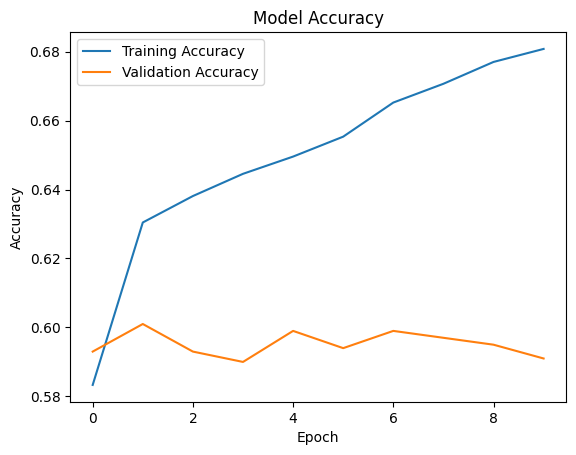

In [22]:

import matplotlib.pyplot as plt

# Get the training and validation accuracy from the history dictionary
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot the training and validation accuracy
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')

# Add labels and title
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

# Display the plot
plt.legend()
plt.show()

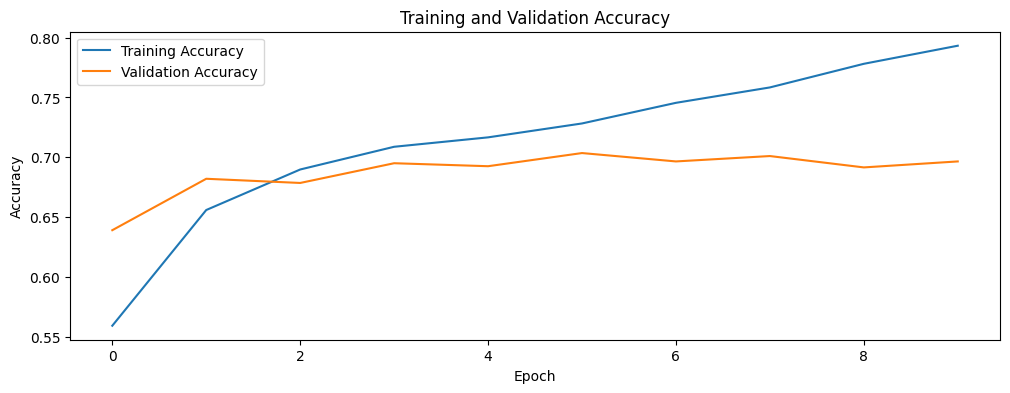

In [ ]:
#ENTER YOUR CODE HERE

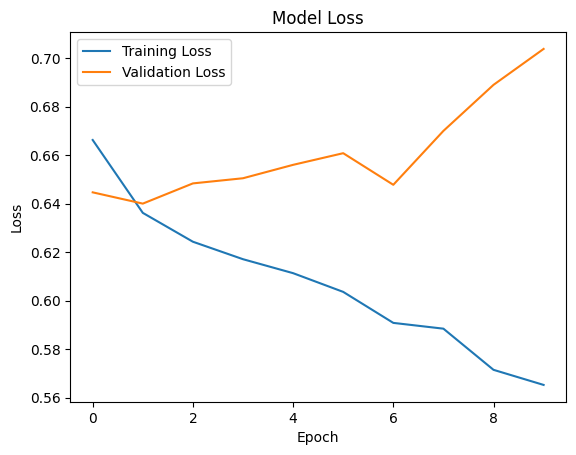

In [23]:

# Get the training and validation loss from the history dictionary
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the training and validation loss
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')

# Add labels and title
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')

# Display the plot
plt.legend()
plt.show()

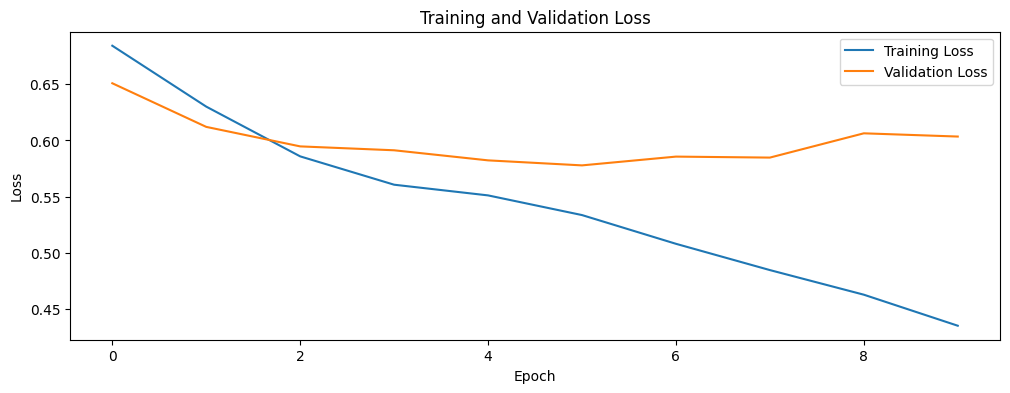

**Lets see what the accuracy of the model is.**

In [ ]:
#ENTER YOUR CODE HERE

In [24]:
from sklearn.metrics import classification_report

# Predict the labels for the test data
y_pred = model.predict(test_padded)

# Convert the predictions to binary values
y_pred_binary = [int(round(p[0])) for p in y_pred]

# Print the classification report
print(classification_report(y_test, y_pred_binary))

32/32 [==============================] - 1s 8ms/step
              precision    recall  f1-score   support

           0       0.61      0.47      0.53       492
           1       0.58      0.71      0.64       508

    accuracy                           0.59      1000
   macro avg       0.59      0.59      0.58      1000
weighted avg       0.59      0.59      0.58      1000



63/63 [==============================] - 2s 24ms/step
              precision    recall  f1-score   support

           0       0.72      0.66      0.69      1012
           1       0.68      0.73      0.70       988

    accuracy                           0.70      2000
   macro avg       0.70      0.70      0.70      2000
weighted avg       0.70      0.70      0.70      2000



**Take a random input sequence from the text series. First predict on it nd gets its sentiment. Then decode the string using the tokenizer, etc. you've developed and print the string as well.**

In [ ]:
#ENTER YOUR CODE HERE

The chosen sequence is: [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0  402 2498  165   91  201    5]
1/1 [==============================] - 1s 835ms/step
The predicted sentiment is: ['Negative']
The original sentiment is: ['Negative']


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#ENTER YOUR CODE HERE

['dad', 'fever', 'again', 'not', 'looking', 'good']


**We can try this on a random string as well.**

In [ ]:
input_str="I hate everyone on earth!"
#ENTER YOUR CODE HERE

After removal of stopwords: 0    I hate everyone earth!
dtype: object
After removal of punctuation: 0    I hate everyone earth 
dtype: object
After stemming: 0    i hate everyone earth 
dtype: object
After tokenization: [[1, 100, 138, 2693]]
After padding: [[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    1  100  138 2693]]
1/1 [==============================] - 0s 58ms/step
The predicted sentiment is: ['Negative']


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## GOOD JOB!